## Exploratory Data Analysis on Terrorism Data Set

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding =('ISO-8859-1'),low_memory =False)
#Renaming Columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
#Selecting Specific Columns
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
#Calculating Casualties:
df['casualities']=df['Killed']+df['Wounded']
#Displaying the First Three Rows:
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [7]:
#display the last 5 rows of the DataFrame
df.tail(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN,3.0
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN,9.0
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN,0.0
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN,0.0
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN,0.0


In [8]:
shape = df.shape

print('Number of columns :', len(df.columns))
print("--------------------------")
df_list = list(df)
print("Total columns present in dataset",df.columns)
print("--------------------------")
print("shape of Dataset",df.shape)

Number of columns : 18
--------------------------
Total columns present in dataset Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')
--------------------------
shape of Dataset (181691, 18)


In [9]:
df=df[['Year','Country','Region','city','AttackType','Target_type','Group','Killed']]
df.head()

,Year,Country,Region,city,AttackType,Target_type,Group,Killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN


In [10]:
print("Total columns present in dataset",df.columns)

df.head()

Total columns present in dataset Index(['Year', 'Country', 'Region', 'city', 'AttackType', 'Target_type',
       'Group', 'Killed'],
      dtype='object')


,Year,Country,Region,city,AttackType,Target_type,Group,Killed
0,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0
1,1970,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0
2,1970,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0
3,1970,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN
4,1970,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN


In [11]:
df.isnull().sum()

Year               0
Country            0
Region             0
city             435
AttackType         0
Target_type        0
Group              0
Killed         10313
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.sort_values(by=['Killed'],ascending=False).head(10)

,Year,Country,Region,city,AttackType,Target_type,Group,Killed
133518,2014,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),1570.0
73126,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1384.0
73127,2001,United States,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1383.0
55934,1994,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Hutu extremists,1180.0
136283,2014,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),953.0
133225,2014,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670.0
179671,2017,Somalia,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Al-Shabaab,588.0
76347,2004,Nepal,South Asia,Dhading district,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518.0
136746,2014,Syria,Middle East & North Africa,Unknown,Hostage Taking (Kidnapping),Military,Islamic State of Iraq and the Levant (ISIL),517.0
170198,2016,Syria,Middle East & North Africa,Palmyra,Hostage Taking (Kidnapping),Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),433.0


In [14]:

year_attacks = df.groupby('Year').size().reset_index(name='count')

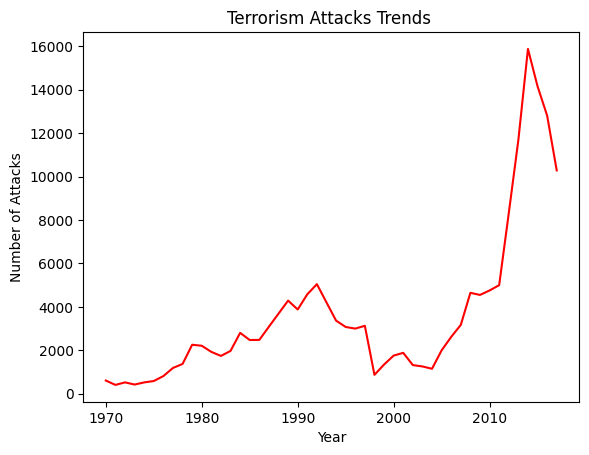

In [15]:
sns.lineplot(x='Year', y='count', data=year_attacks, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends ")
plt.show()

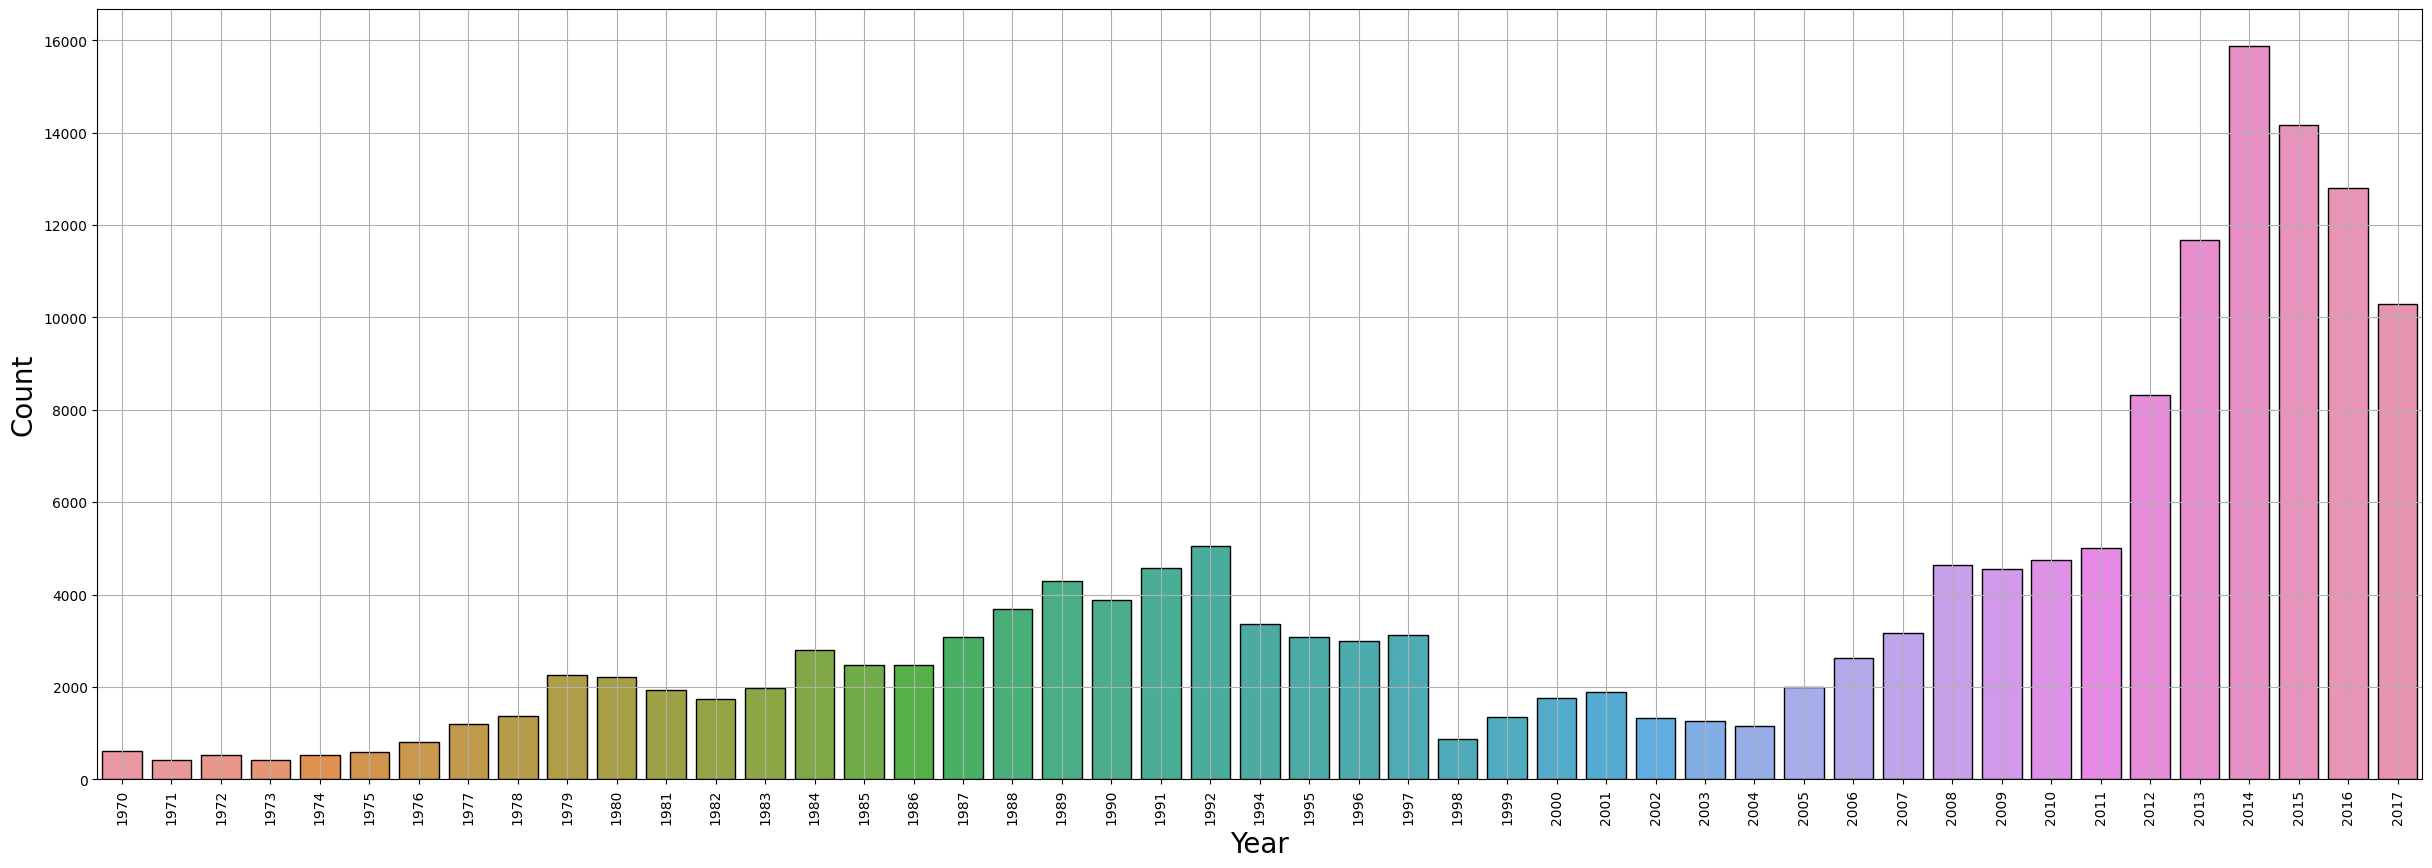

In [16]:
plt.subplots(figsize=(30,10))
sns.countplot(x='Year', data=df,ec='black')
plt.xticks(rotation=90)
plt.xlabel("Year",fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.show()

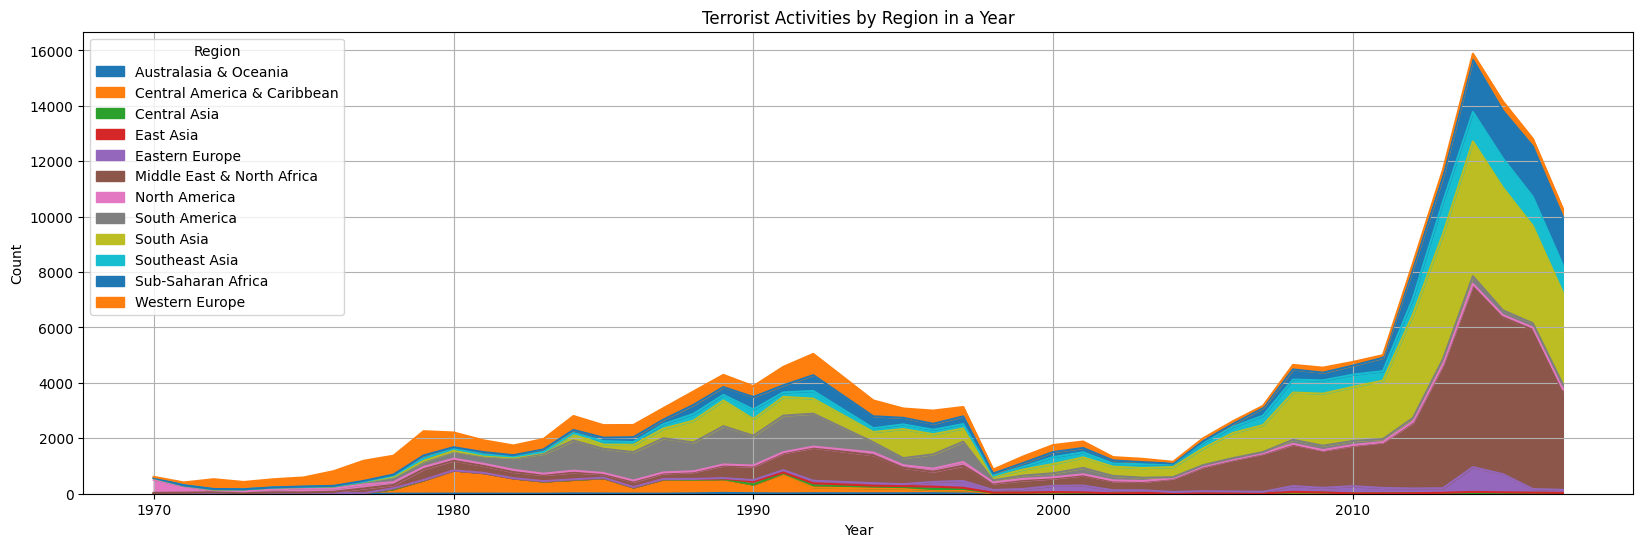

In [17]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(20,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Terrorist Activities by Region in a Year')
plt.grid(True)
plt.show()

In [18]:
r_type=df.Region.value_counts().to_frame().reset_index()
print(r_type)
r_type.columns=['region_name','count']
     

                         Region  count
0    Middle East & North Africa  48171
1                    South Asia  43887
2                 South America  17306
3            Sub-Saharan Africa  15937
4                Western Europe  15727
5                Southeast Asia  11960
6   Central America & Caribbean   8022
7                Eastern Europe   4973
8                 North America   3363
9                     East Asia    763
10                 Central Asia    558
11        Australasia & Oceania    276


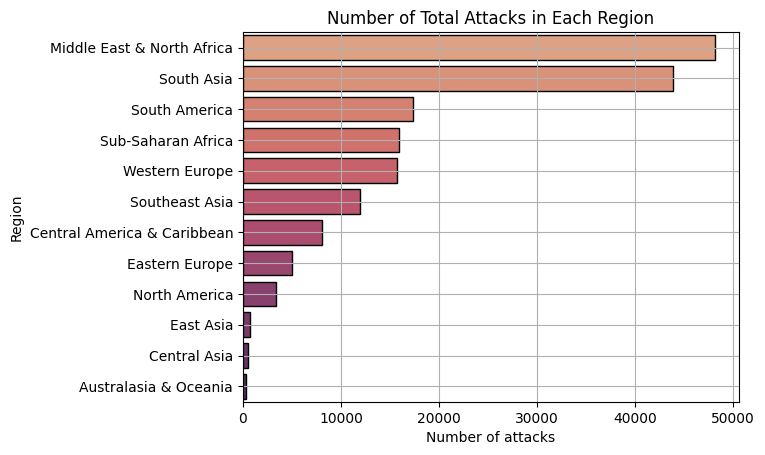

In [19]:
az=sns.barplot(y='region_name',x='count',data=r_type,palette='flare',ec='black')
plt.grid(True)
plt.title("Number of Total Attacks in Each Region")
plt.ylabel('Region')
plt.xlabel('Number of attacks')

plt.show()

In [20]:
top_10_country=df.Country.value_counts()[:10].to_frame().reset_index()
top_10_country
     

,Country,count
0,Iraq,23895
1,Pakistan,14108
2,Afghanistan,12223
3,India,11740
4,Colombia,7848
5,Philippines,6694
6,Peru,5457
7,United Kingdom,5065
8,Turkey,4160
9,El Salvador,3939


In [21]:
top_10_country.columns=['country_name','count']

In [22]:

top_10_country

,country_name,count
0,Iraq,23895
1,Pakistan,14108
2,Afghanistan,12223
3,India,11740
4,Colombia,7848
5,Philippines,6694
6,Peru,5457
7,United Kingdom,5065
8,Turkey,4160
9,El Salvador,3939


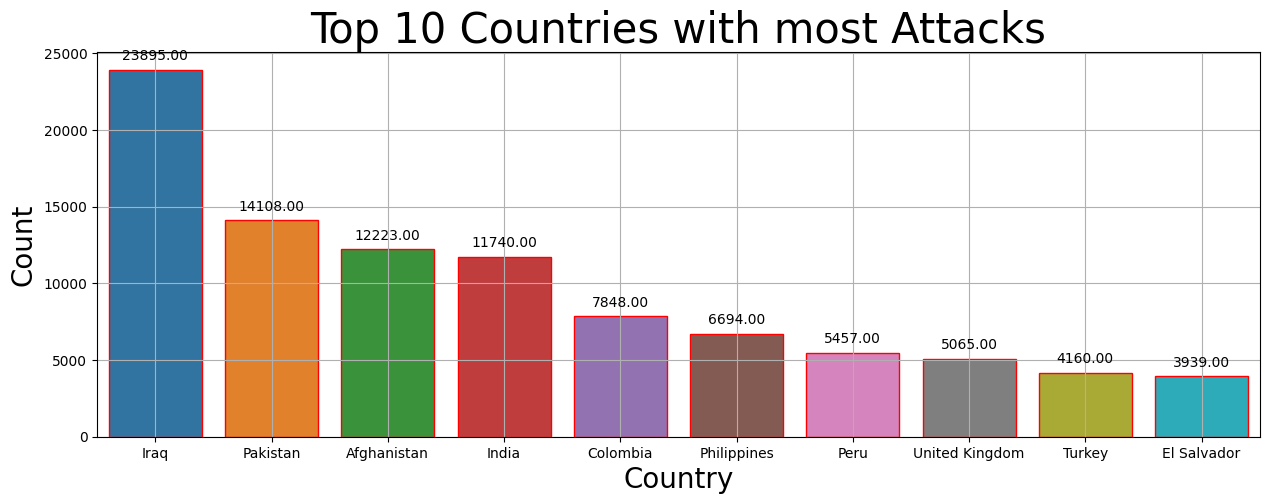

In [23]:
plt.figure(figsize=(15,5))
ay=sns.barplot(data=top_10_country,x='country_name',y='count',ec='red',lw=1)
plt.grid(True)
plt.title('Top 10 Countries with most Attacks',fontsize=30)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Count',fontsize=20)

for p in ay.patches:
    ay.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

In [24]:
top_10_country_kill=df.groupby('Country').Killed.sum().to_frame().reset_index().sort_values('Killed',ascending=False)[0:10]
top_10_country_kill

,Country,Killed
81,Iraq,78567.0
0,Afghanistan,39137.0
131,Pakistan,23811.0
127,Nigeria,22682.0
77,India,19341.0
164,Sri Lanka,15530.0
172,Syria,15205.0
33,Colombia,14698.0
136,Peru,12771.0
50,El Salvador,12053.0


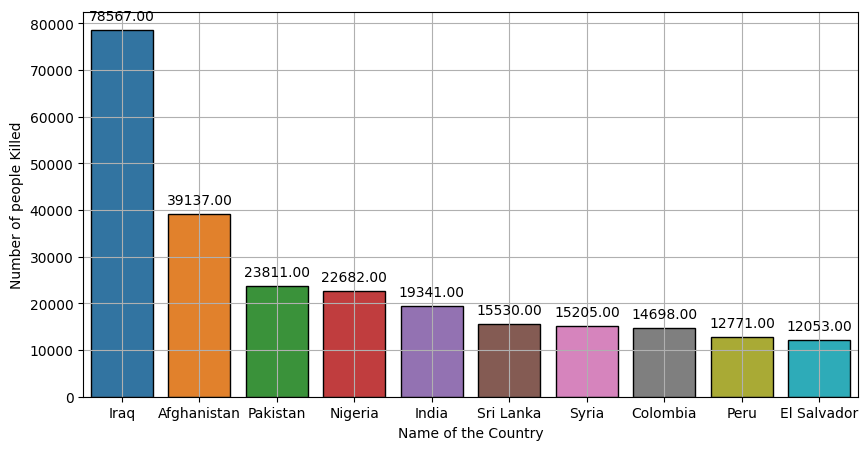

In [25]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y='Killed',x='Country',data=top_10_country_kill,ec='black')
plt.xlabel('Name of the Country')
plt.ylabel('Number of people Killed')
plt.grid(True)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.show()

In [26]:

df.Region.value_counts()

Region
Middle East & North Africa     48171
South Asia                     43887
South America                  17306
Sub-Saharan Africa             15937
Western Europe                 15727
Southeast Asia                 11960
Central America & Caribbean     8022
Eastern Europe                  4973
North America                   3363
East Asia                        763
Central Asia                     558
Australasia & Oceania            276
Name: count, dtype: int64

In [27]:
data_south_asia=df[df['Region']=='South Asia']
data_south_asia.head()

,Year,Country,Region,city,AttackType,Target_type,Group,Killed
585,1970,Pakistan,South Asia,Karachi,Assassination,Government (Diplomatic),Unknown,4.0
1186,1972,India,South Asia,New Delhi,Hijacking,Airports & Aircraft,Palestinians,0.0
1863,1973,Afghanistan,South Asia,Kabul,Unknown,Airports & Aircraft,Black December,0.0
2217,1974,Pakistan,South Asia,Karachi,Bombing/Explosion,Maritime,Muslim Guerrillas,0.0
2705,1974,Pakistan,South Asia,Peshawar,Bombing/Explosion,Government (Diplomatic),Unknown,0.0


In [28]:
data_south_asia.Country.count()
data_ind_pak_afg=data_south_asia


In [29]:
data_ind_pak_afg = data_ind_pak_afg[(data_ind_pak_afg.Country=='Pakistan') | (data_ind_pak_afg.Country=='Afghanistan') | (data_ind_pak_afg.Country=='India')]
data_ind_pak_afg.head()

,Year,Country,Region,city,AttackType,Target_type,Group,Killed
585,1970,Pakistan,South Asia,Karachi,Assassination,Government (Diplomatic),Unknown,4.0
1186,1972,India,South Asia,New Delhi,Hijacking,Airports & Aircraft,Palestinians,0.0
1863,1973,Afghanistan,South Asia,Kabul,Unknown,Airports & Aircraft,Black December,0.0
2217,1974,Pakistan,South Asia,Karachi,Bombing/Explosion,Maritime,Muslim Guerrillas,0.0
2705,1974,Pakistan,South Asia,Peshawar,Bombing/Explosion,Government (Diplomatic),Unknown,0.0


In [30]:
data_ind_pak_afg_count = (data_ind_pak_afg.groupby(['Country','Year'])['Killed'].size()).reset_index()
data_ind_pak_afg_count

,Country,Year,Killed
0,Afghanistan,1973,1
1,Afghanistan,1979,3
2,Afghanistan,1987,1
3,Afghanistan,1988,11
4,Afghanistan,1989,10
...,...,...,...
112,Pakistan,2013,2160
113,Pakistan,2014,2106
114,Pakistan,2015,1210
115,Pakistan,2016,844


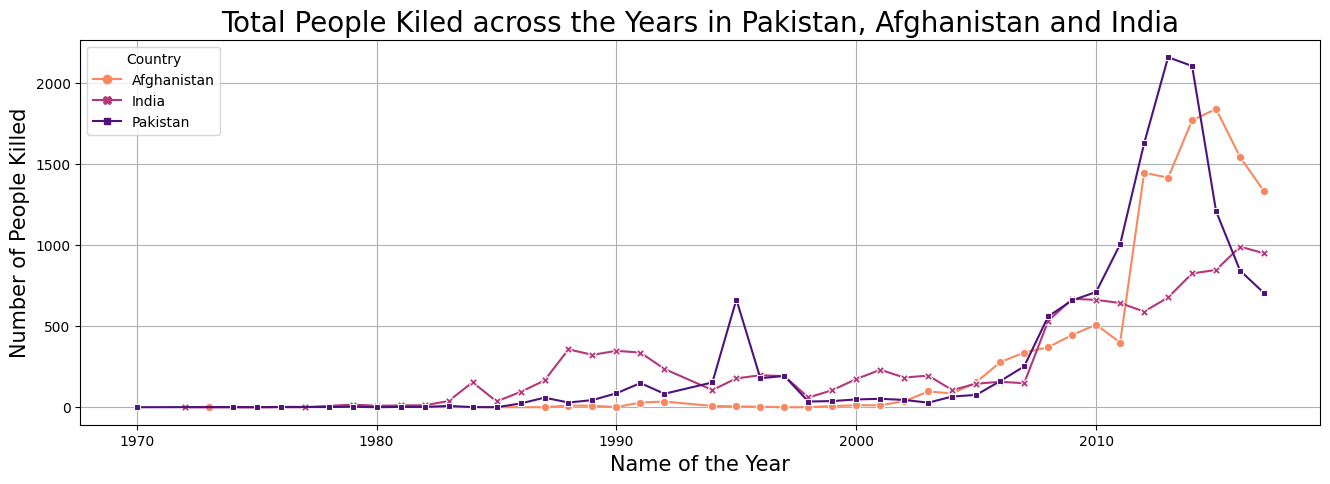

In [31]:
fig = plt.figure(figsize=(16,5))
sns.lineplot(data = data_ind_pak_afg_count,x = 'Year',y = 'Killed',hue = 'Country',style = 'Country',palette='magma_r',markers=True, dashes=False)
plt.title("Total People Kiled across the Years in Pakistan, Afghanistan and India",fontsize=20)
plt.grid(True)
plt.xlabel('Name of the Year',fontsize=15)
plt.ylabel('Number of People Killed',fontsize=15)
plt.show()

In [32]:
df['Target_type'].value_counts().head()


Target_type
Private Citizens & Property    40884
Military                       25622
Police                         23712
Government (General)           20282
Business                       19142
Name: count, dtype: int64

In [33]:
df['Target_type'].value_counts().head()

Target_type
Private Citizens & Property    40884
Military                       25622
Police                         23712
Government (General)           20282
Business                       19142
Name: count, dtype: int64

In [34]:
list(df['Target_type'].value_counts().head())
     

[40884, 25622, 23712, 20282, 19142]

In [35]:
list(df['Target_type'].value_counts().head().keys())

['Private Citizens & Property',
 'Military',
 'Police',
 'Government (General)',
 'Business']

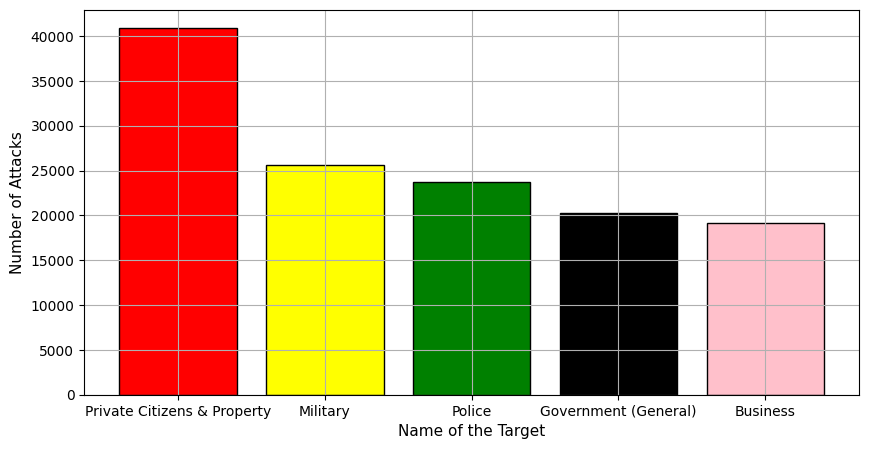

In [36]:
plt.figure(figsize=(10,5))
col=['red','yellow','green','black','pink','orange']
plt.bar(list(df['Target_type'].value_counts().head().keys()),list(df['Target_type'].value_counts().head()),color=col,ec='black')
plt.grid(True)
plt.xlabel('Name of the Target',fontsize=11)
plt.ylabel('Number of Attacks',fontsize=11)


plt.show()

In [37]:
year=(df.groupby(['Year'])['Killed'].size()).reset_index()
year

,Year,Killed
0,1970,609
1,1971,407
2,1972,524
3,1973,424
4,1974,523
5,1975,587
6,1976,814
7,1977,1189
8,1978,1373
9,1979,2257


In [38]:

list(year['Year'])

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

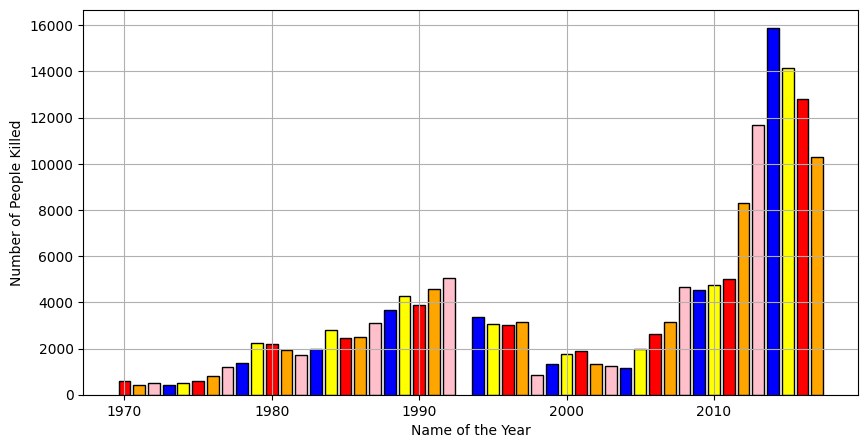

In [39]:
plt.figure(figsize=(10,5))
color=['red','orange','pink','blue','yellow']
plt.bar(list(year['Year']),list(year['Killed']),color=color,ec='black')
plt.grid(True)
plt.xlabel('Name of the Year')
plt.ylabel('Number of People Killed')
plt.show()

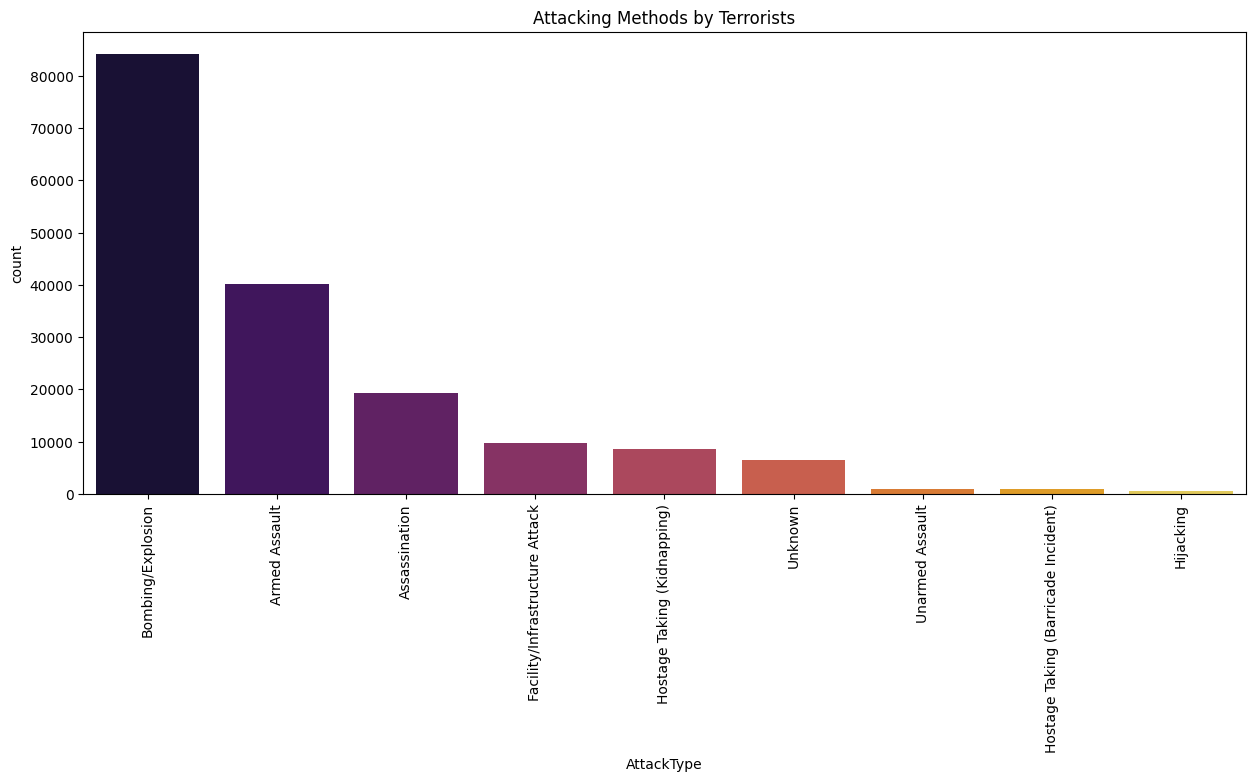

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15, 6))
sns.countplot(x='AttackType', data=df, palette='inferno', order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()
